<a href="https://colab.research.google.com/github/Abdullahi-Ahmed/Hypothesizing-Linearity/blob/main/Hypothesizing_Linearity_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
#loading the data

data = pd.read_csv("/tmp/Walmart_Store_sales.csv")

In [35]:
#checking if there's any missing value in the dataset
#this a huge dataset thus checking for .values.any function
data.isnull().values.any()


False

In [36]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [37]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [38]:
data.shape
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [39]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [40]:
#using groupby function to group all the stores and sum function to sum up all the sales in a particular store 
#to get the maximum sales across all the stores i used nlargest function to compare the maximum sales in all the stores
Maximum_Sales = data.groupby(["Store"], sort =True)["Weekly_Sales"].sum().reset_index().nlargest(5,'Weekly_Sales')


In [41]:
d = {'Weekly_Sales':'Maximum_Sales', 'Temperature':'Avg_Temperature', 'Fuel_Price':'Avg_Fuel_Price', 'CPI':'Avg_CPI', 'Unemployment':'Avg_Unemployment' }
Agg_data = data.groupby('Store').agg({'Weekly_Sales':'sum', 'Temperature':'mean', 'Fuel_Price':'mean', 'CPI':'mean', 'Unemployment':'mean'}).rename(columns=d).sort_values(by=['Maximum_Sales'],ascending=[False])
Agg_data.head()


,Maximum_Sales,Avg_Temperature,Avg_Fuel_Price,Avg_CPI,Avg_Unemployment
Store,,,,,
20,3.013978e+08,55.451399,3.417608,209.038131,7.371413
4,2.995440e+08,62.253357,3.216972,128.679669,5.964692
14,2.889999e+08,57.790979,3.417608,186.285678,8.648748
13,2.865177e+08,53.697133,3.286147,128.679669,7.001825
2,2.753824e+08,68.216364,3.219699,215.646311,7.623846


In [42]:
features= data.drop(['Store', 'Holiday_Flag', 'Date'], axis = 1)
holidaydf = data[["Holiday_Flag"]].copy()

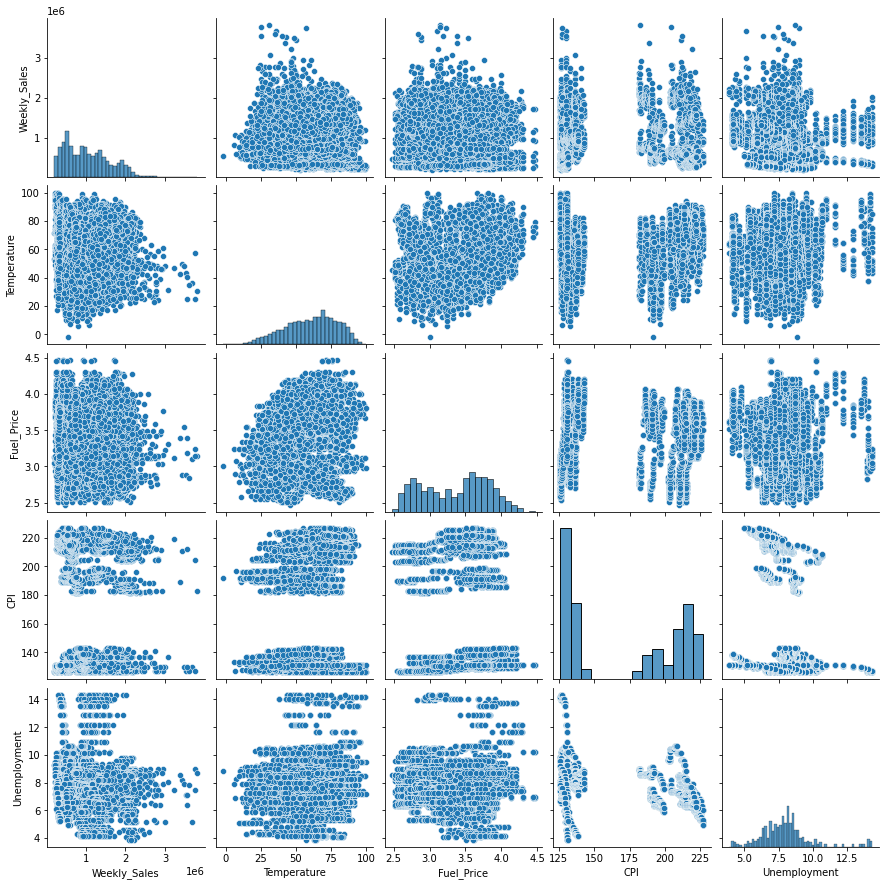

In [43]:
sns.pairplot(features)

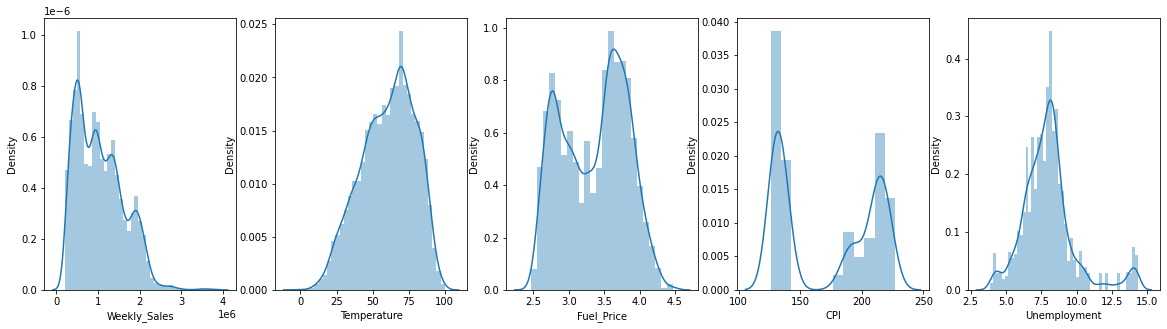

In [44]:
fig, ax = plt.subplots(1,5, figsize=(20,5))

for i, feature in enumerate(features):
  sns.distplot(features[feature], ax=ax[i])

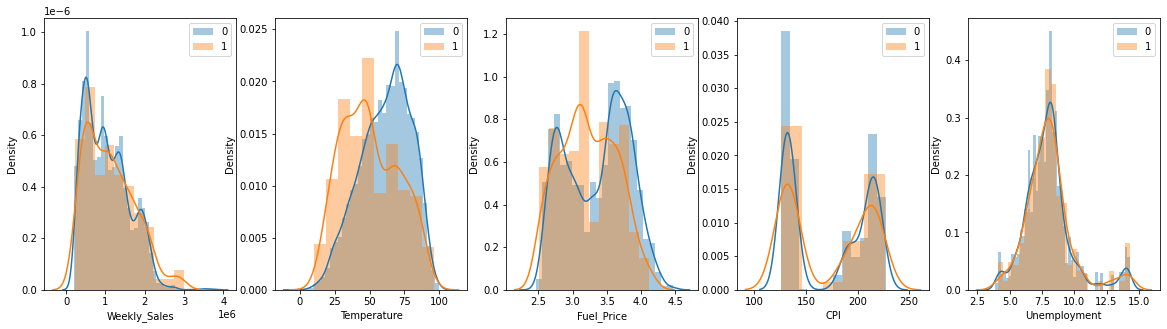

In [45]:
holidays = data["Holiday_Flag"].unique()

fig, ax = plt.subplots(1,5, figsize=(20,5))

for i, feature in enumerate(features):
  for holiday in holidays:
    subset = features[holidaydf["Holiday_Flag"] == holiday]
    sns.distplot(subset[feature], ax=ax[i], label=holiday)
  ax[i].legend()


#### A standard deviation is a statistic that measures the dispersion of a dataset relative to its mean.  

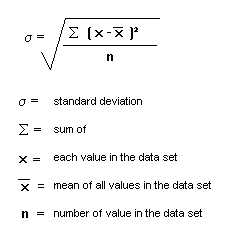

In [46]:
#Getting the standard deviation of the sales
#group the stores to find the which store that have maximum standard deviation
Max_Std = data.groupby(['Store'], sort =True)['Weekly_Sales'].std().reset_index().nlargest(5,'Weekly_Sales')
Max_Std

,Store,Weekly_Sales
13,14,317569.949476
9,10,302262.062504
19,20,275900.562742
3,4,266201.442297
12,13,265506.995776


##### The coefficient of variation (CV) is a statistical measure of the dispersion of data points in a data series around the mean. The coefficient of variation represents the ratio of the standard deviation to the mean 
CV= μ/σ

where:  
σ=standard deviation   
μ=mean



In [47]:
coef_mean_std_per_Store = data.groupby('Store')['Weekly_Sales'].std() / data.groupby('Store')['Weekly_Sales'].mean()
coef_mean_std_per_Store.head()

Store
1    0.100292
2    0.123424
3    0.115021
4    0.127083
5    0.118668
Name: Weekly_Sales, dtype: float64

In [48]:
coef_mean_std = data['Weekly_Sales'].std() / data['Weekly_Sales'].mean()
coef_mean_std

0.5390501956168998

In [49]:
#1. copy all the data set to new_data
#2.Change the date format for more friendly way to program with Timestamp
#3.since Date is object we convert it to datetype of ease computing of quarterly growth 
#4. Create a new column called year from data column
#5. Drop all the data that is not of year 2012
#6. Compute quarterly growth rate of the dataset (2012)
new_data = data.copy()
new_data['Date'] = new_data['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
new_data["Date"] = pd.to_datetime(new_data["Date"])
new_data['year'] = new_data['Date'].dt.year
new_data.drop(new_data[new_data['year'] != 2012].index, inplace = True)

Q3_growth = new_data.sort_values(by =["Store", "Date"]).groupby(["Store"]).agg(Q3 =("Weekly_Sales", lambda x:(x.iloc[2] - x.iloc[1])/(x.iloc[1]) *100 )).reset_index().nlargest(10,'Q3')
Q3_growth.head()

,Store,Q3
22,23,11.201767
14,15,8.485213
34,35,7.152843
13,14,5.474732
17,18,5.324223


In [50]:
#Some holidays have a negative impact on sales. 
# question: Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
#1. Find out the mean sales in holiday & non-holiday season
data.groupby(["Holiday_Flag"])["Weekly_Sales"].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [51]:
#2. Finding out holidays mean
#  Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
#  Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
#  Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
#  Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
from datetime import date,datetime 
data['Date'] = data['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
data["Date"] = pd.to_datetime(data["Date"])



#marking the holiday dates 
Christmas1 = pd.Timestamp(date(2010,12,31))
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )

SuperBowl1 = pd.Timestamp(date(2010,2,12))
SuperBowl2= pd.Timestamp(date(2011,2,11))
SuperBowl3= pd.Timestamp(date(2012,2,10))
SuperBowl4= pd.Timestamp(date(2013,2,13))

Labourday1 = pd.Timestamp(date(2010,9,10))
Labourday2 = pd.Timestamp(date(2011,9,9))
Labourday3 = pd.Timestamp(date(2012,9,7))
Labourday4 = pd.Timestamp(date(2013,9,6))

Thanksgiving1 = pd.Timestamp(date(2010,11,26))
Thanksgiving2 = pd.Timestamp(date(2011,11,25))
Thanksgiving3 = pd.Timestamp(date(2012,11,23))
Thanksgiving4 = pd.Timestamp(date(2013,11,29))

Christmas_mean_sales=data[(data['Date'] == Christmas1) | (data['Date'] == Christmas2) | (data['Date'] == Christmas3) | (data['Date'] == Christmas4)]
Thanksgiving_mean_sales=data[(data['Date'] == Thanksgiving1) | (data['Date'] == Thanksgiving2) | (data['Date'] == Thanksgiving3) | (data['Date'] == Thanksgiving4)]
LabourDay_mean_sales=data[(data['Date'] == Labourday1) | (data['Date'] == Labourday2) | (data['Date'] == Labourday3) | (data['Date'] == Labourday4)]
SuperBowl_mean_sales=data[(data['Date'] == SuperBowl1) | (data['Date'] == SuperBowl2) | (data['Date'] == SuperBowl3) | (data['Date'] == SuperBowl4)]

list_of_mean_sales = {'Christmas_mean_sales' : round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay_mean_sales' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sales':round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : data[data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()}
list_of_mean_sales





{'Christmas_mean_sales': 960833.11,
 'LabourDay_mean_sales': 1039182.83,
 'Non holiday weekly sales': 1041256.3802088564,
 'SuperBowl_mean_sales': nan,
 'Thanksgiving_mean_sales': 1471273.43}

In [52]:
non_holiday_mean_sales = data[data['Holiday_Flag']==0]['Weekly_Sales'].mean()
Date_higher = pd.DataFrame(data[data['Holiday_Flag']==1].groupby('Date')['Weekly_Sales'].mean())
camparedf = (Date_higher[Date_higher['Weekly_Sales'] > non_holiday_mean_sales])
camparedf


#Christmas1 = 2010-12-31
#Christmas2 = 2011-12-30
#Christmas3 = 2012-12-28
#Christmas4 = 2013-12-27
#
#SuperBowl1 = 2010-2-12
#SuperBowl2= 2011-2-11
#SuperBowl3= 2012-2-10
#SuperBowl4= 2013-2-13
#
#Labourday1 = 2010-9-10
#Labourday2 = 2011-9-9
#Labourday3 = 2012-9-7
#Labourday4 = 2013-9-6
#
#Thanksgiving1 = 2010-11-26
#Thanksgiving2 = 2011-11-25
#Thanksgiving3 = 2012-11-23
#Thanksgiving4 = 2013-11-29

,Weekly_Sales
Date,
2010-11-26,1.462689e+06
2010-12-02,1.074148e+06
2011-11-02,1.051915e+06
2011-11-25,1.479858e+06
2012-07-09,1.074001e+06
2012-10-02,1.111320e+06


Text(0, 0.5, 'Weekly_Sales')

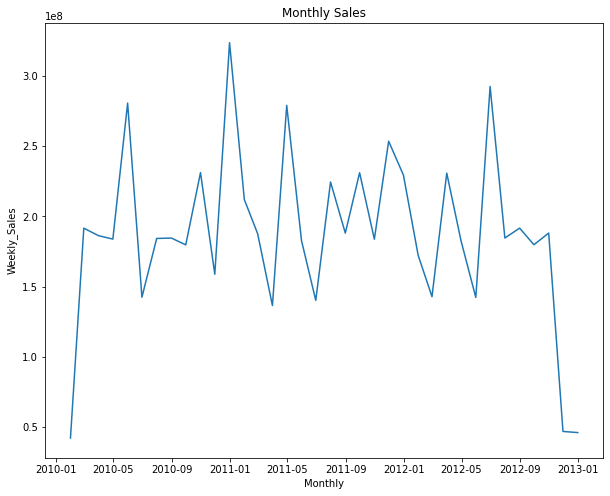

In [53]:
#Monthly sales 
monthly = data.groupby(pd.Grouper(key='Date', freq='1M')).sum()# groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Monthly Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

Text(0, 0.5, 'Weekly_Sales')

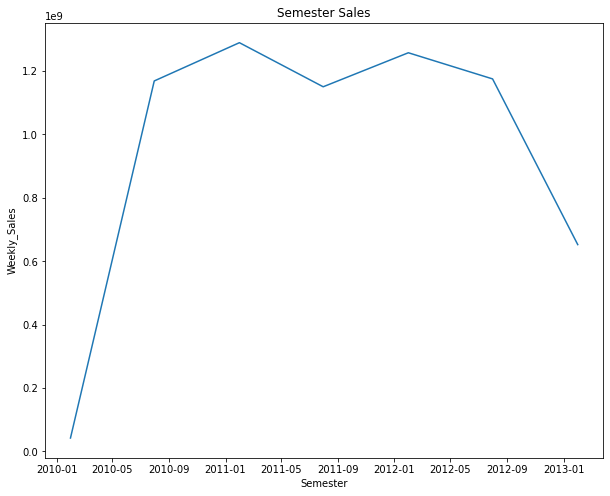

In [54]:
#Semester Sales 
Semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

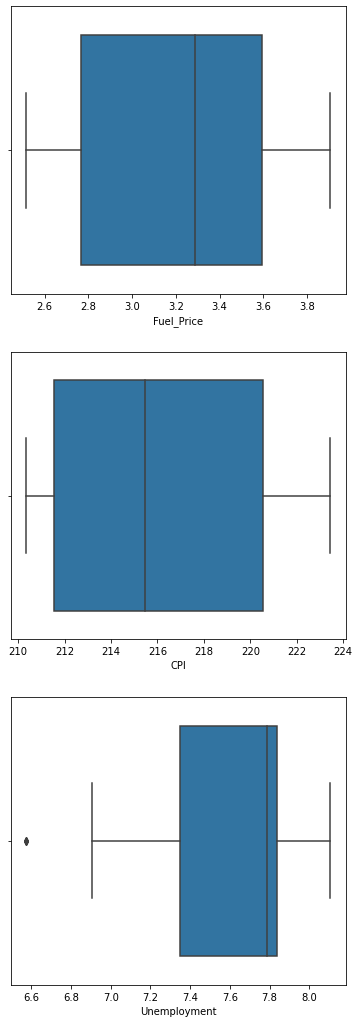

In [55]:
#before building the model checking the outliers
# Since the question target only store 1 we drop all other 44 stores in our dataset
store1_data = data.copy()
store1_data.drop(store1_data[store1_data['Store'] != 1].index, inplace = True)
    

fig, axs = plt.subplots(3,figsize=(6,18))
X = store1_data[['Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(store1_data[column], ax=axs[i])

In [56]:
#now remove the only outliers seens in the above plots i.e unemployment
all_data = store1_data[(store1_data["Unemployment"]< 9) & (store1_data["Unemployment"] >6.8)]


In [57]:
#now remove the only outliers seens in the above plots i.e unemployment
all_data = store1_data[(store1_data["Unemployment"]< 9) & (store1_data["Unemployment"] >6.8)]


In [58]:
#Building the forcast model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [59]:
#putting the response and target in place
x = all_data[["Fuel_Price", "CPI", "Unemployment"]]
y = all_data["Weekly_Sales"]

#spliting the data into 70 train and 30 test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=42)

In [60]:
#Linear regression
reg = LinearRegression() 
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print ('Accuracy:', reg.score(x_train, y_train)*100)

Accuracy: 10.547197366140137


In [61]:
import time
all_data['Days'] =all_data['Date'].dt.dayofweek
all_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0


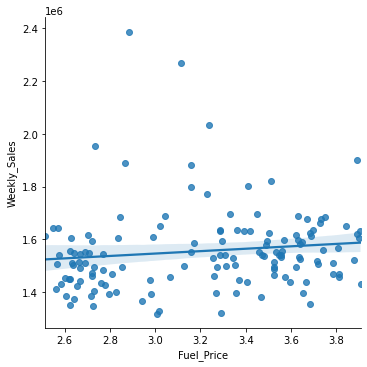

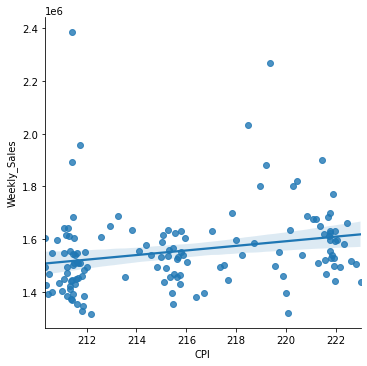

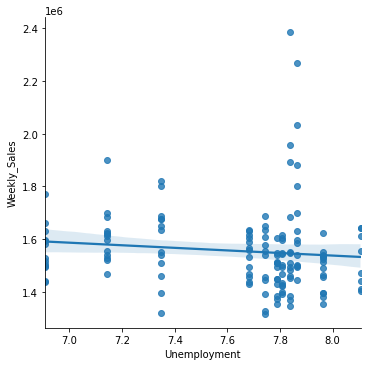

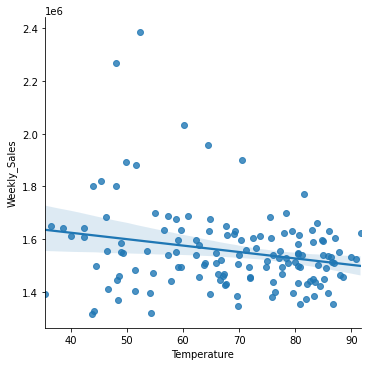

In [62]:
sns.lmplot(x='Fuel_Price', y = 'Weekly_Sales', data = all_data)
#plt.figure()
sns.lmplot(x='CPI', y = 'Weekly_Sales', data = all_data)

sns.lmplot(x='Unemployment', y = 'Weekly_Sales', data = all_data)
#plt.figure()
sns.lmplot(x='Temperature', y = 'Weekly_Sales', data = all_data)

In [63]:
#putting the the new Varible into the label while the target remain the same
x = all_data[["Days", "Fuel_Price", "CPI", "Unemployment"]]
y = all_data["Weekly_Sales"]


#spliting the data into 70 train and 30 test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

In [64]:
#Linear regression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print ('Accuracy:', reg.score(x_train, y_train)*100)

Accuracy: 12.72384629654879


In [65]:
store_one = data.groupby('Store')[['Fuel_Price','Unemployment', 'CPI','Weekly_Sales', 'Holiday_Flag']]
factors  = store_one.get_group(1) #Filter by Store 1
day_arr = [1]
for i in range (1,len(factors)):
    day_arr.append(i*7)
    
factors['Day'] = day_arr.copy()
factors.head()

,Fuel_Price,Unemployment,CPI,Weekly_Sales,Holiday_Flag,Day
0,2.572,8.106,211.096358,1643690.90,0,1
1,2.548,8.106,211.242170,1641957.44,1,7
2,2.514,8.106,211.289143,1611968.17,0,14
3,2.561,8.106,211.319643,1409727.59,0,21
4,2.625,8.106,211.350143,1554806.68,0,28


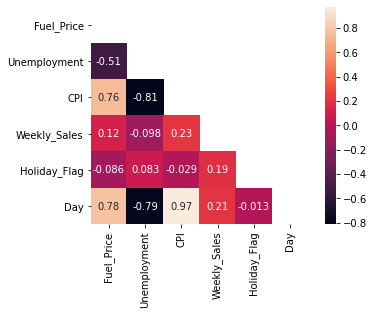

In [66]:
corr = factors.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
sns.heatmap(corr, mask=mask, square=True, annot=True)

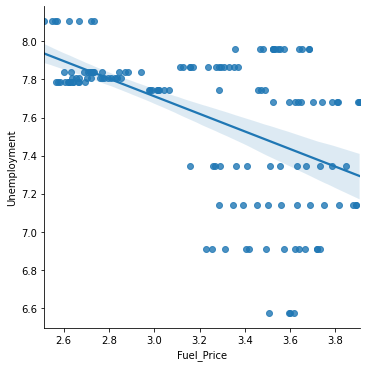

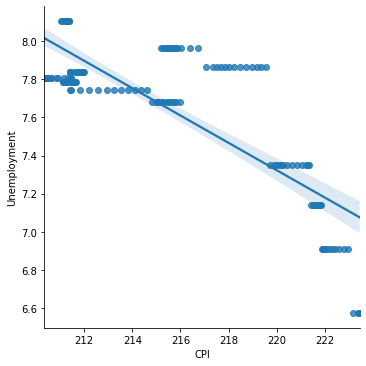

In [67]:
sns.lmplot(x='Fuel_Price', y = 'Unemployment', data = factors)
#plt.figure()
sns.lmplot(x='CPI', y = 'Unemployment', data = factors)

3.106725927640744e-144
reject null hypothesis


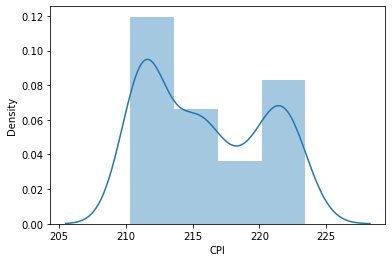

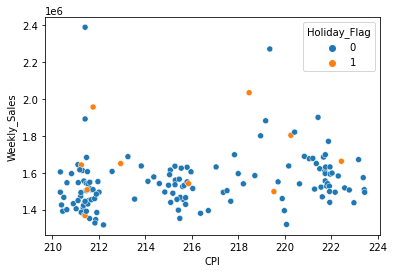

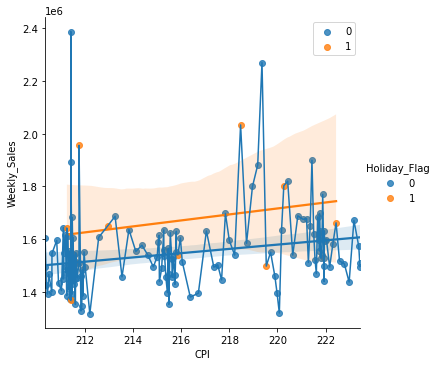

In [68]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['CPI'])
sns.distplot(factors.CPI)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lmplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lineplot(x='CPI', y = 'Weekly_Sales', data = factors)

3.050079726743709e-144
reject null hypothesis


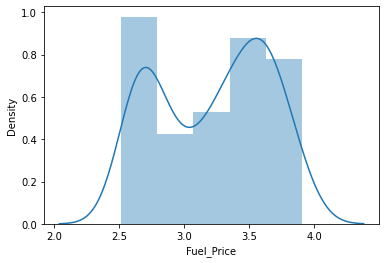

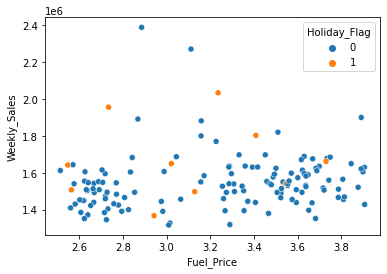

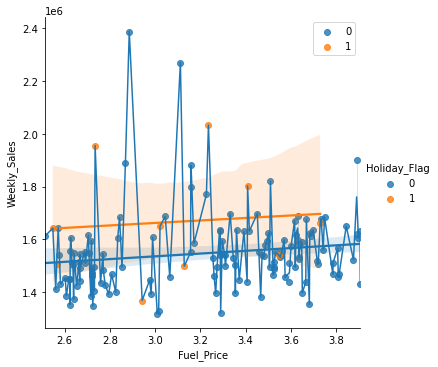

In [69]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Fuel_Price'])
sns.distplot(factors.Fuel_Price)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lmplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lineplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors)

3.0515405336011733e-144
reject null hypothesis


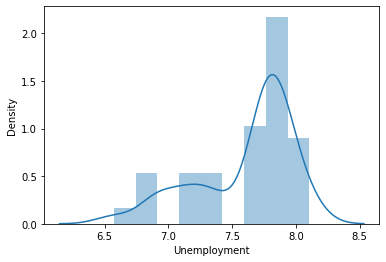

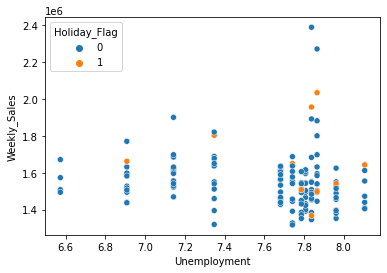

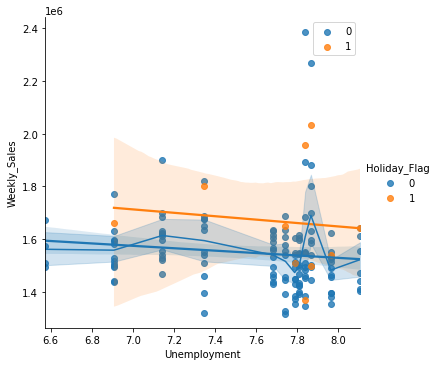

In [70]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Unemployment'])
sns.distplot(factors.Unemployment)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lmplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lineplot(x='Unemployment', y = 'Weekly_Sales', data = factors)